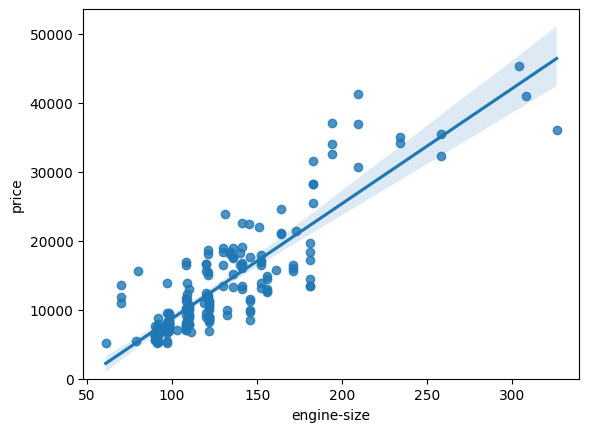

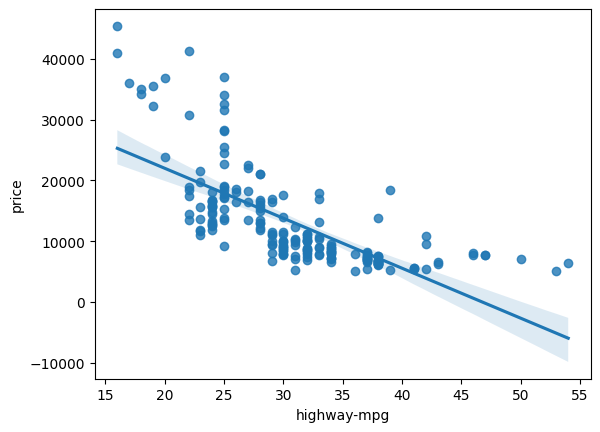

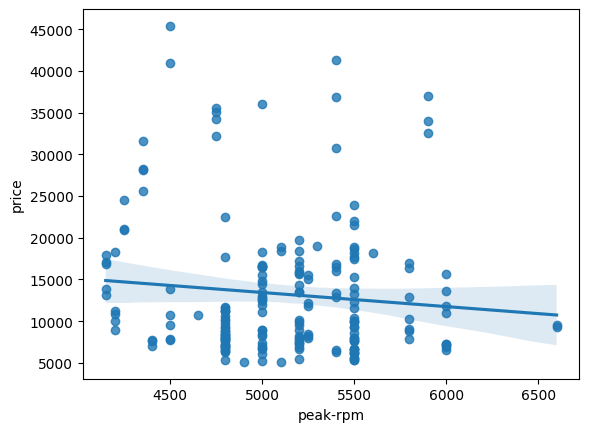

         stroke    price
stroke  1.00000  0.08231
price   0.08231  1.00000


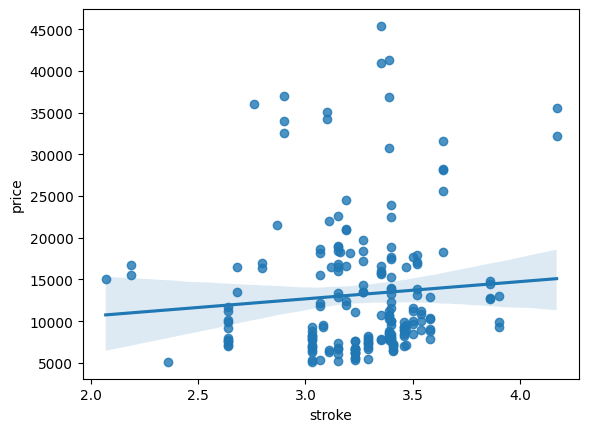

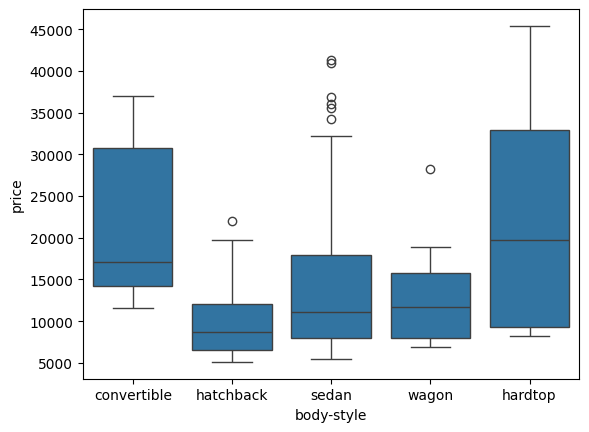

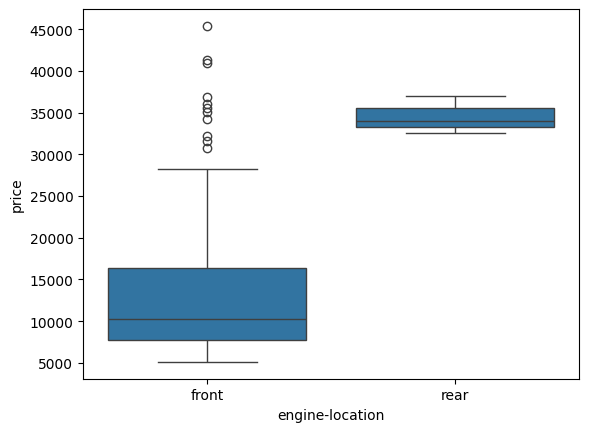

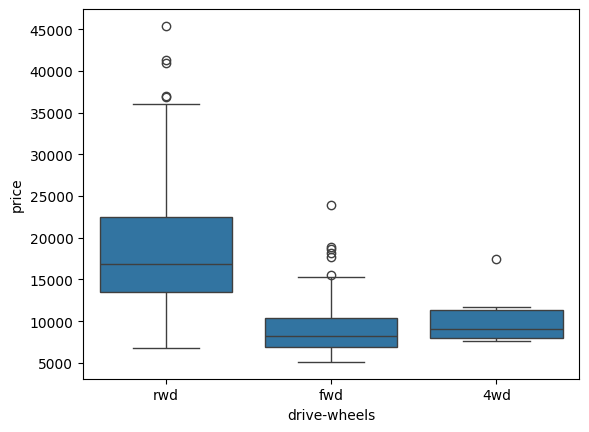

                 count
engine-location       
front              198
rear                 3
DF Group One: 
   drive-wheels         price
0          4wd  10241.000000
1          fwd   9244.779661
2          rwd  19757.613333
   drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222
                   price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                      

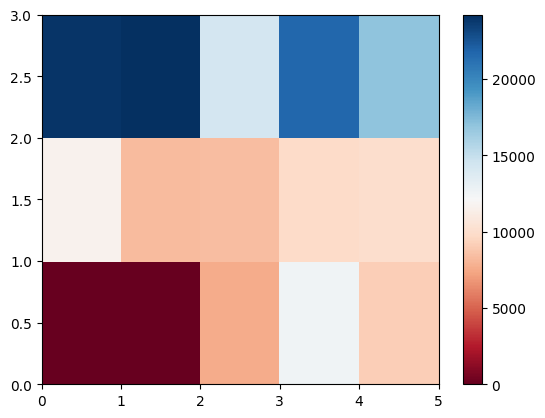

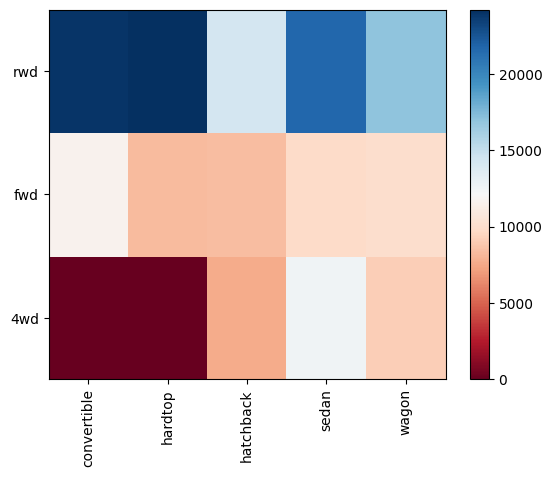

The Pearson Correlation Coefficient is:
 0.5846418222655081 
with a value of P =	 8.076488270732947e-20
The Pearson Correlation Coefficient is:  nan 
with a P-value of P =  nan
The Pearson Correlation Coefficient is:  0.6906283804483642 
with a P-value of P =  8.016477466158771e-30
The Pearson Correlation Coefficient is:  0.7512653440522674 
with a P-value of P =  9.20033551048134e-38
The Pearson Correlation Coefficient is:  0.8344145257702845 
with a P-value of P =  2.1895772388939584e-53
The Pearson Correlation Coefficient is:  0.8723351674455185 
with a P-value of P =  9.265491622198827e-64
The Pearson Correlation Coefficient is:  nan 
with a P-value of P =  nan
The Pearson Correlation Coefficient is:  -0.6865710067844679 
with a P-value of P =  2.3211320655674997e-29
The Pearson Correlation Coefficient is:  -0.7046922650589529 
with a P-value of P =  1.749547114447669e-31
    drive-wheels    price
0            rwd  13495.0
1            rwd  16500.0
3            fwd  13950.0
4      

/var/folders/th/gk42vq0d6sq5qyj_z0s1ndyh0000gn/T/ipykernel_30374/1346930615.py:162: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_test2.get_group('4wd')['price']
/var/folders/th/gk42vq0d6sq5qyj_z0s1ndyh0000gn/T/ipykernel_30374/1346930615.py:165: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
/var/folders/th/gk42vq0d6sq5qyj_z0s1ndyh0000gn/T/ipykernel_30374/1346930615.py:169: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` ins

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

path = "./automobileClean.csv"

df = pd.read_csv(path, header = 0)
# print(df.head())


# df1 = df.replace('?', np.nan)
# df = df1.dropna(subset=["price"], axis=0)

df['price'] = df['price'].astype(float)

# print(df.dtypes)

# df.to_csv('automobileClean.csv')


# print(df[['bore','stroke','compression-ratio','horsepower']].corr())

figpath = "./Plots"

# Engine size as a potential predictor variable of price
plot = sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

plt.savefig("./Plots/RegPlot/engine-sizeVprice")
plt.show()
plt.clf()

sns.regplot(x="highway-mpg", y="price", data=df)
plt.savefig("./Plots/RegPlot/highway-mpgVprice")
plt.show()
plt.clf()

df[['highway-mpg', 'price']].corr()

sns.regplot(x="peak-rpm", y="price", data=df)
plt.savefig("./Plots/RegPlot/peak-rpmVprice")
plt.show()
plt.clf()

df[['peak-rpm', 'price']].corr()

print(df[['stroke', 'price']].corr())
sns.regplot(x='stroke', y='price', data=df)
plt.savefig("./Plots/RegPlot/stroke-price")
plt.show()
plt.clf()

sns.boxplot(x="body-style", y="price", data=df)
plt.savefig("./Plots/BoxPlot/body-styleVprice")
plt.show()
plt.clf()

sns.boxplot(x="engine-location", y="price", data=df)
plt.savefig("./Plots/BoxPlot/engine-locationVprice")
plt.show()
plt.clf()

sns.boxplot(x="drive-wheels", y="price", data=df)
plt.savefig("./Plots/BoxPlot/drive-wheelsVprice")
plt.show()
plt.clf()

df.describe()

df.describe(include=['object'])

df['drive-wheels'].value_counts()

df['drive-wheels'].value_counts().to_frame()

engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace = True)
engine_loc_counts.index.name = 'engine-location'
print(engine_loc_counts.head(10))

df['drive-wheels'].unique()

df_group_one = df[['drive-wheels', 'body-style', 'price']]
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean(numeric_only=True)
print("DF Group One: \n", df_group_one)

df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean(numeric_only=True)
print(grouped_test1)

grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
print(grouped_pivot)

grouped_pivot = grouped_pivot.fillna(0)
print(grouped_pivot)

grouped_test_bodystyle = df_gptest.groupby(['body-style'], as_index=False).mean(numeric_only=True)
print(grouped_test_bodystyle)


plt.pcolor(grouped_pivot, cmap="RdBu")
plt.colorbar()
plt.savefig("./Plots/HeatMap/groupedPivotMap")
plt.show()

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is:\n", pearson_coef, "\nwith a value of P =\t", p_value)

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is: ", pearson_coef, "\nwith a P-value of P = ", p_value)

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is: ", pearson_coef, "\nwith a P-value of P = ", p_value)

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is: ", pearson_coef, "\nwith a P-value of P = ", p_value)

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is: ", pearson_coef, "\nwith a P-value of P = ", p_value)

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is: ", pearson_coef, "\nwith a P-value of P = ", p_value)

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is: ", pearson_coef, "\nwith a P-value of P = ", p_value)

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is: ", pearson_coef, "\nwith a P-value of P = ", p_value)

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is: ", pearson_coef, "\nwith a P-value of P = ", p_value)

grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
print(grouped_test2.head(2))

df_gptest

grouped_test2.get_group('4wd')['price']

# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

print("ANOVA results: F= ", f_val, ", P = ", p_val)

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])

print("ANOVA results: F = ", f_val, ", P = ", p_val)